In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import sys
sys.path.append('../script')
from plots import *
from data_extraction import *

In [4]:
#start with importing the data from our database
conn = connection()

In [5]:
data = table_to_sql(conn, 'telecom_data')

c:\Users\ok\Desktop\10 Acadamy\week_1\week_1\notebook\../script\data_extraction.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [6]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,1970-01-01,4/25/2019 14:35,1970-01-01,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,1970-01-01,4/25/2019 8:15,1970-01-01,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1970-01-01,4/25/2019 11:58,1970-01-01,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,1970-01-01,4/25/2019 7:36,1970-01-01,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,1970-01-01,4/25/2019 10:40,1970-01-01,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
#top 10 users as per session frequency
session=data.groupby(["MSISDN/Number"]).agg({"Bearer Id":"count"})
session = session.rename(columns={"Bearer Id":"sessions count"})
session = session.sort_values(by=["sessions count"],ascending=False)

session.head(10)

,sessions count
MSISDN/Number,
3.366371e+10,1067
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360452e+10,12


In [12]:
#top 10 users as per session duration
duration=data.groupby(["MSISDN/Number"]).agg({"Dur. (ms).1":"sum"})
duration = duration.rename(columns={"Dur. (ms).1":"session duration (ms)"})
duration = duration.sort_values(by=["session duration (ms)"],ascending=False)

duration.head(10)

,session duration (ms)
MSISDN/Number,
3.366371e+10,7.265611e+10
3.362578e+10,1.855376e+10
3.361489e+10,9.966906e+09
3.376054e+10,9.279442e+09
3.362632e+10,8.791937e+09
3.366716e+10,8.744922e+09
3.366284e+10,6.614274e+09
3.366469e+10,6.288736e+09
3.360313e+10,6.287767e+09


In [13]:
data['total_data(bytes)']=data['Total UL (Bytes)']+data['Total DL (Bytes)'] #total data
#top 10 users as per total download (bytes)
download=data.groupby(["MSISDN/Number"]).agg({"total_data(bytes)":"sum"})
download = download.sort_values(by=["total_data(bytes)"],ascending=False)

download.head(10)

,total_data(bytes)
MSISDN/Number,
3.366371e+10,5.319636e+11
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09


In [15]:
#lets create a dataframe with customet id, session frequency, duration and total download
metrics = data.groupby('MSISDN/Number').agg({'Bearer Id': 'count','Dur. (ms).1': 'sum', 'total_data(bytes)': 'sum',})
metrics = metrics.rename(columns={'Bearer Id': 'sessions_frequency',"Dur. (ms).1":"session_duration(ms)"})

metrics.head(10)

,sessions_frequency,session_duration(ms),total_data(bytes)
MSISDN/Number,,,
3.360100e+10,1,116720140.0,8.786906e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09
3.360101e+10,2,253983077.0,6.152172e+08
3.360101e+10,2,128360523.0,6.547231e+08
3.360101e+10,1,86399977.0,3.326604e+08
3.360101e+10,2,495702147.0,9.901322e+08


In [33]:
#fetch the 3 metrics for normilization
df = metrics[['sessions_frequency','session_duration(ms)','total_data(bytes)']]
#normalize the data
norm = Normalizer()
normilized = pd.DataFrame(norm.fit_transform(df), columns=df.columns)

normilized.head()

,sessions_frequency,session_duration(ms),total_data(bytes)
0,1.128148e-09,0.131678,0.991293
1,4.172117e-09,0.756117,0.654437
2,1.636504e-09,0.220878,0.975301
3,2.351525e-09,0.117289,0.993098
4,1.371852e-09,0.025451,0.999676


In [22]:
normilized.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sessions_frequency,106856.0,2.525414e-09,1.664720e-09,6.186450e-10,1.456447e-09,1.951853e-09,2.938970e-09,2.129486e-08
session_duration(ms),106856.0,2.421770e-01,1.903872e-01,8.330468e-03,1.094210e-01,1.864795e-01,3.168216e-01,9.956517e-01
total_data(bytes),106856.0,9.465441e-01,9.569542e-02,9.315394e-02,9.484852e-01,9.824589e-01,9.939955e-01,9.999653e-01


In [29]:
normilized.index

Float64Index([    33601001722.0,     33601001754.0,     33601002511.0,
                  33601007832.0,     33601008617.0,     33601010682.0,
                  33601011634.0,     33601011959.0,     33601014694.0,
                  33601020306.0,
              ...
                  33789953832.0,     33789955678.0,     33789960306.0,
                  33789967113.0,     33789980299.0,     33789996170.0,
                  33789997247.0,   3197020876596.0, 337000037000919.0,
              882397108489451.0],
             dtype='float64', name='MSISDN/Number', length=106856)

In [34]:
metrics_cluster = normilized.copy()

In [35]:
#by using K-means clustering we will cluster the users into 3 groups
kmeans = KMeans(n_clusters=3)
kmeans.fit(normilized)
labels = kmeans.labels_
metrics_cluster['clusters'] = labels

metrics_cluster.head()

c:\Users\ok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sessions_frequency,session_duration(ms),total_data(bytes),clusters
0,1.128148e-09,0.131678,0.991293,1
1,4.172117e-09,0.756117,0.654437,0
2,1.636504e-09,0.220878,0.975301,1
3,2.351525e-09,0.117289,0.993098,1
4,1.371852e-09,0.025451,0.999676,1


In [36]:
#cluster 1 description
metrics_cluster[metrics_cluster['clusters']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sessions_frequency,9371.0,4.710099e-09,2.065886e-09,6.186450e-10,3.200037e-09,4.451560e-09,6.123489e-09,1.851191e-08
session_duration(ms),9371.0,7.060079e-01,1.099383e-01,5.522335e-01,6.120317e-01,6.868271e-01,7.849468e-01,9.956517e-01
total_data(bytes),9371.0,6.867133e-01,1.337703e-01,9.315394e-02,6.195631e-01,7.268209e-01,7.908332e-01,8.336895e-01
clusters,9371.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [37]:
#cluster 2 description
metrics_cluster[metrics_cluster['clusters']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sessions_frequency,69278.0,1.993011e-09,1.165916e-09,1.031685e-09,1.337079e-09,1.667781e-09,2.190914e-09,1.866071e-08
session_duration(ms),69278.0,1.306466e-01,6.327211e-02,8.330468e-03,7.937273e-02,1.307027e-01,1.817400e-01,2.488845e-01
total_data(bytes),69278.0,9.893707e-01,8.586461e-03,9.685332e-01,9.833466e-01,9.914216e-01,9.968450e-01,9.999653e-01
clusters,69278.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [38]:
#cluster 3 description
metrics_cluster[metrics_cluster['clusters']==2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sessions_frequency,28207.0,3.107225e-09,1.766850e-09,9.174403e-10,1.934594e-09,2.692655e-09,3.705726e-09,2.129486e-08
session_duration(ms),28207.0,3.620069e-01,8.415679e-02,2.488956e-01,2.889785e-01,3.445749e-01,4.251778e-01,5.522313e-01
total_data(bytes),28207.0,9.276813e-01,3.572663e-02,8.336910e-01,9.051099e-01,9.387588e-01,9.573356e-01,9.685303e-01
clusters,28207.0,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


In [42]:
#aggregate the total data per application for each user
#for the sake of simplicity, lets assume that the total data per application is the sum of the download and upload data
data['social_media'] = data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)']
data['google'] = data['Google DL (Bytes)'] + data['Google UL (Bytes)']
data['email'] = data['Email DL (Bytes)'] + data['Email UL (Bytes)']
data['youtube'] = data['Youtube DL (Bytes)'] + data['Youtube UL (Bytes)']
data['netflix'] = data['Netflix DL (Bytes)'] + data['Netflix UL (Bytes)']
data['gaming'] = data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)']
data['other'] = data['Other DL (Bytes)'] + data['Other UL (Bytes)']
 

In [43]:
#noe lets aggregate the total data per application for each user
aap_data = data.groupby('MSISDN/Number').agg({'social_media': 'sum','google': 'sum','email': 'sum','youtube': 'sum','netflix': 'sum','gaming': 'sum','other': 'sum'})
aap_data.head()

,social_media,google,email,youtube,netflix,gaming,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [45]:
#top 10 users of each application
#social media
agg = aap_data.groupby('MSISDN/Number').agg({'social_media': 'sum'})
agg.sort_values(by=['social_media'],ascending=False).head(10)


,social_media
MSISDN/Number,
3.366371e+10,1.974199e+09
3.362632e+10,4.337478e+07
3.376054e+10,3.978319e+07
3.365973e+10,3.541236e+07
3.361489e+10,2.829454e+07
3.362578e+10,2.713550e+07
3.366716e+10,2.424785e+07
3.378632e+10,2.397492e+07
3.366907e+10,2.380083e+07


In [46]:
#email
agg1 = aap_data.groupby('MSISDN/Number').agg({'email': 'sum'})
agg1.sort_values(by=['email'],ascending=False).head(10)


,email
MSISDN/Number,
3.366371e+10,2.403622e+09
3.362632e+10,4.241878e+07
3.361489e+10,4.078863e+07
3.362578e+10,4.063397e+07
3.378632e+10,3.631012e+07
3.365973e+10,3.599979e+07
3.376054e+10,3.369377e+07
3.367588e+10,3.151442e+07
3.366546e+10,3.041788e+07


In [47]:
#youtube
agg2 = aap_data.groupby('MSISDN/Number').agg({'youtube': 'sum'})
agg2.sort_values(by=['youtube'],ascending=False).head(10)

,youtube
MSISDN/Number,
3.366371e+10,2.435073e+10
3.362578e+10,4.529588e+08
3.376054e+10,3.962892e+08
3.361489e+10,3.943702e+08
3.362632e+10,3.744830e+08
3.367588e+10,3.174106e+08
3.366716e+10,3.152313e+08
3.362708e+10,3.087908e+08
3.376041e+10,3.031691e+08


In [48]:
#netflix
agg3 = aap_data.groupby('MSISDN/Number').agg({'netflix': 'sum'})
agg3.sort_values(by=['netflix'],ascending=False).head(10)

,netflix
MSISDN/Number,
3.366371e+10,2.428211e+10
3.365973e+10,3.995191e+08
3.361489e+10,3.614010e+08
3.362578e+10,3.569806e+08
3.376054e+10,3.346433e+08
3.362632e+10,3.287257e+08
3.376041e+10,3.183475e+08
3.366716e+10,3.139395e+08
3.367588e+10,3.090932e+08


In [49]:
#gaming
agg4 = aap_data.groupby('MSISDN/Number').agg({'gaming': 'sum'})
agg4.sort_values(by=['gaming'],ascending=False).head(10)

,gaming
MSISDN/Number,
3.366371e+10,4.616346e+11
3.361489e+10,7.749432e+09
3.376054e+10,7.461045e+09
3.362578e+10,7.326673e+09
3.367588e+10,6.970568e+09
3.362632e+10,6.887572e+09
3.365973e+10,6.725559e+09
3.366646e+10,6.646303e+09
3.376041e+10,6.268620e+09


In [50]:
#google
agg5 = aap_data.groupby('MSISDN/Number').agg({'google': 'sum'})
agg5.sort_values(by=['google'],ascending=False).head(10)

,google
MSISDN/Number,
3.366371e+10,8.250702e+09
3.362632e+10,1.521919e+08
3.362578e+10,1.423079e+08
3.361489e+10,1.279738e+08
3.376054e+10,1.232231e+08
3.365973e+10,1.165163e+08
3.378632e+10,1.102545e+08
3.367588e+10,1.098605e+08
3.366716e+10,1.050327e+08


In [51]:
#other
agg6 = aap_data.groupby('MSISDN/Number').agg({'other': 'sum'})
agg6.sort_values(by=['other'],ascending=False).head(10)


,other
MSISDN/Number,
3.366371e+10,4.516521e+11
3.362632e+10,8.167878e+09
3.361489e+10,7.639264e+09
3.367588e+10,6.798515e+09
3.362578e+10,6.354583e+09
3.360313e+10,6.326671e+09
3.365973e+10,6.317415e+09
3.362695e+10,5.305448e+09
3.362708e+10,5.117791e+09


In [ ]:
app_cols = ['social_media', 'email', 'google']

for app in app_cols:
    
    app_agg = renamed_df.groupby('msisdn').agg({app : 'sum'})
    top_app_users = app_agg.sort_values(by=[app], ascending=False).head(10)
    ax = top_app_users.plot.bar(
        y=[app], 
        title=f"Top 10 customers that are engaged to {app}",
        figsize=(10,7))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    plt.show()

In [ ]:
#plot the top 3 most used applications


In [54]:
#finding th optimal k

cluster = []
for k in range(1, 10):
    k_mean = KMeans(n_clusters=k).fit(normilized)
    cluster.append([k, k_mean.inertia_])

c:\Users\ok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

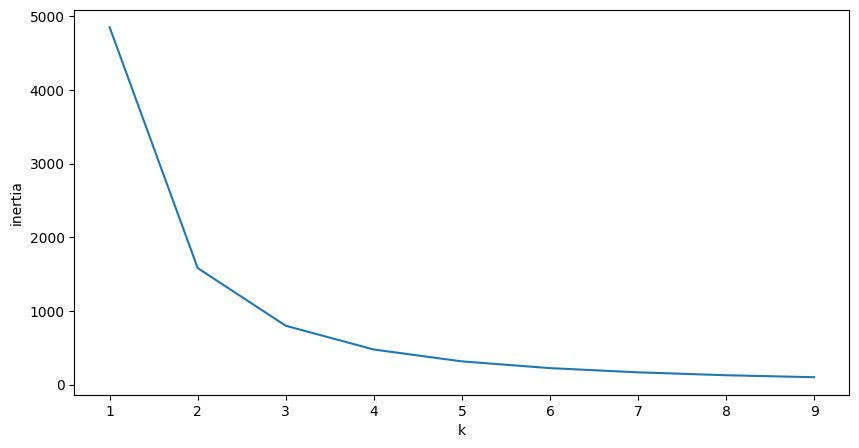

In [55]:
# plot inertia using line graph with k as x-axis and inertia as y-axis and use seaborn to plot it and the horizontal separation be 1 
plt.figure(figsize=(10,5))
sns.lineplot(x='k', y='inertia', data=pd.DataFrame(cluster, columns=['k', 'inertia']))
plt.show()

the optimal k value is 3

In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
●	sessions frequency 
●	the duration of the session 
●	the sessions total traffic (download and upload (bytes))

Task 3.1 - Based on the above submit python script and slide :
●	Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 
●	Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
●	Aggregate user total traffic per application and derive the top 10 most engaged users per application
●	Plot the top 3 most used applications using appropriate charts.  
●	Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
○	What is the optimized value of k (use elbow method for this)?  
○	Interpret your findings. 
